In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from gp_fit import GP_model

C) plot pointwise posterior means and 95% confidence intervals

In [3]:
#%% get data: ethanol
df=pd.read_csv('ethanol.csv')
df = df.sort_values(by=['E'])
y_e = (df['NOx']).to_numpy()
X_e = (df['E']).to_numpy().reshape(-1,1)

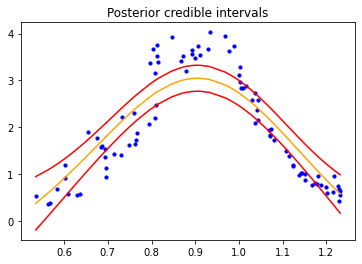

In [4]:
#%% ethanol data, matern 52 kernel
p = [2, 10**(-6), 0.6]
gp_ethan = GP_model(X_e, y_e)
gp_ethan.get_intervals(p, gp_ethan.cov_52)

In [5]:
#%%
df=pd.read_csv('utilities.csv')
df = df.sort_values(by=['temp'])
X = df['temp'].to_numpy().reshape(-1,1)
y =  (df['gasbill']/df['billingdays']).to_numpy()

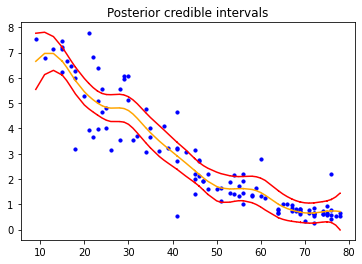

In [6]:
#utilities data, matern 52 kernel
p = [3, 10**(-10), 10]
gp_ut = GP_model(X, y)
gp_ut.get_intervals(p, gp_ut.cov_52)

E) Now we want to evaluate the marginal likelihood over a grid of different values for $\tau_1^2$ and $b$.

highest when tau_1^2 = [[42.32323232]], b = [[63.33333333]]


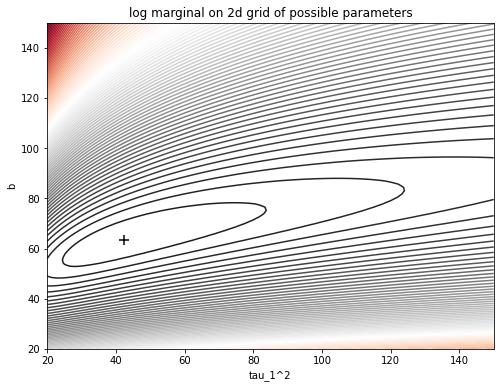

In [7]:
#set range
tau_1_range = np.linspace(20, 150, 100)
b_range = np.linspace(20, 150, 100)
#get grid and choice. Note: exponetial kernel for the marginal
gp_ut.parameters_grid(tau_1_range, b_range)

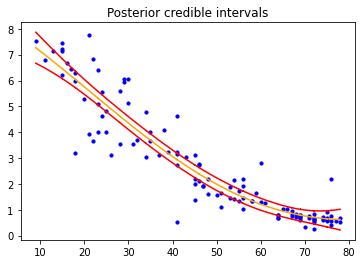

In [8]:
#utilities data, exponential kernel, new selected parameters
gp_ut.get_intervals([42,10**(-6), 63], gp_ut.cov_exp)

parameters seem to be too high: make the posterior very smooth

highest when tau_1^2 = [[3.39437374]], b = [[0.19192]]


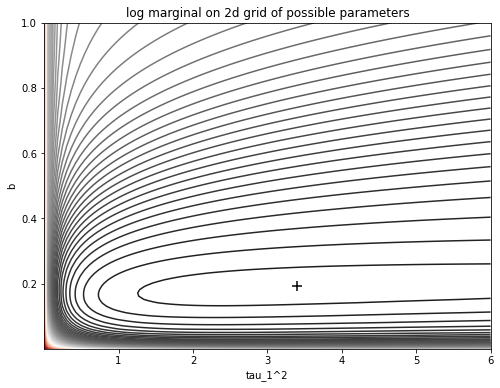

In [9]:
#different dataset
#set range
tau_1_range = np.linspace(0.001, 6, 100)
b_range = np.linspace(0.000001, 1, 100)
#get grid and choice
gp_ethan.parameters_grid(tau_1_range, b_range)

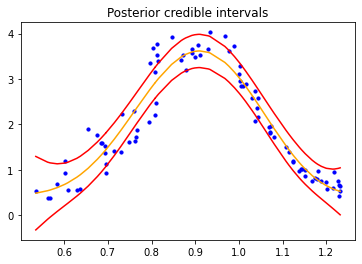

In [11]:
#ethanol data, exponential kernel, new selected parameters
gp_ethan.get_intervals([3.5,10**(-6), 0.2], gp_ethan.cov_exp)